In [4]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
import numpy as np

IMAGE_SIZE = (150,150)

x = []
y = []

folder = './train'
set = os.listdir(folder)
num_classes = 0

for i in set:
    if(int(i) <= 90):
        num_classes += 1
        for file in os.listdir(f"{folder}/{i}"):
            if file[-4:]=='.jpg':
                image=keras.preprocessing.image.load_img(f"{folder}/{i}/{file}", grayscale=False, color_mode='rgb', target_size=(150,150))
                x_arr = keras.preprocessing.image.img_to_array(image)
                y.append(int(i[-3:]))
                x.append(x_arr)
#print(f"Det er {num_classes} klasser")
print(len(x))
print(len(y))

8594
8594


In [5]:
import os
x_test = []
y_test = []

folder = './test'
set = os.listdir(folder)
for i in set:
    if(int(i) <= 90):
        for file in os.listdir(f"{folder}/{i}"):
            if file[-4:]=='.jpg':
                image=keras.preprocessing.image.load_img(f"{folder}/{i}/{file}", grayscale=False, color_mode='rgb', target_size=(150,150))
                x_arr = keras.preprocessing.image.img_to_array(image)
                y_test.append(int(i[-3:]))
                x_test.append(x_arr)
print(len(x_test))
len(x_test)

3115


3115

In [6]:
x = np.asarray(x)
y = np.asarray(y)
x = x.astype('float32')
x /= 255.0

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
x_test = x_test.astype('float32')
x_test /= 255.0

print('Min: %.3f, Max: %.3f' % (x.min(), x.max()))
print('Min: %.3f, Max: %.3f' % (x_test.min(), x_test.max()))

Min: 0.000, Max: 1.000
Min: 0.000, Max: 1.000


In [82]:
print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)

(8594, 150, 150, 3)
(8594,)
(3115, 150, 150, 3)
(3115,)


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=45,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode='reflect',
    horizontal_flip = True)


In [10]:
from tensorflow.keras import layers
from tensorflow import keras
def build_model():
    return tf.keras.models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='linear')
])

model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [11]:
epochs = 50
batch_size= 64
steps_per_epoch = len(x) // batch_size
print(len(x))

#Antall bilder = batch * steps = 20 * 100 = 2000

8594


In [14]:
model = build_model()

model.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics=['mean_absolute_error'])

model_history = model.fit(
            datagen.flow(x,y,batch_size=batch_size),
            steps_per_epoch = steps_per_epoch,
            validation_data = (x_test,y_test),
            epochs = epochs,
            verbose=True)

#model.evaluate() Kan brukes for å sjekke modellen, men det er nok bedre å gjøre det direkte i mo del_fit.

Epoch 1/50
134/134 [==============================] - 158s 1s/step - loss: 21.8691 - mean_absolute_error: 21.8691 - val_loss: 22.2552 - val_mean_absolute_error: 22.2552
Epoch 2/50
134/134 [==============================] - 163s 1s/step - loss: 19.2087 - mean_absolute_error: 19.2087 - val_loss: 22.1778 - val_mean_absolute_error: 22.1778
Epoch 3/50
134/134 [==============================] - 164s 1s/step - loss: 17.5812 - mean_absolute_error: 17.5812 - val_loss: 20.3964 - val_mean_absolute_error: 20.3964
Epoch 4/50
134/134 [==============================] - 170s 1s/step - loss: 16.6565 - mean_absolute_error: 16.6565 - val_loss: 19.6357 - val_mean_absolute_error: 19.6357
Epoch 5/50
134/134 [==============================] - 171s 1s/step - loss: 16.2228 - mean_absolute_error: 16.2228 - val_loss: 17.7357 - val_mean_absolute_error: 17.7357
Epoch 6/50
134/134 [==============================] - 177s 1s/step - loss: 15.9441 - mean_absolute_error: 15.9441 - val_loss: 17.2711 - val_mean_absolute_e

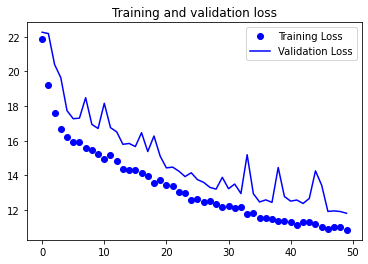

In [15]:
import matplotlib.pyplot as plt

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(50)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [61]:
def classify(num):
    if(num > 100):
        return 10
    return num//10

def is_correct(val_num, pred_num) -> bool:
    num = classify(pred_num)
    num2 = classify(val_num)
    if(num == num2):        
        return True
    else:
        return False

In [62]:
def model_accuracy(model, val_x, val_y):
    num_correct = 0
    for i in range(len(val_x)):
        val = tf.expand_dims(val_x[i], 0)
        pred_num = model.predict(val)
        val_num = val_y[i]
        if(is_correct(val_num, int(pred_num.item()))):
            num_correct = num_correct + 1
    return num_correct * 100 / len(val_x) 

model_accuracy(model, x_test, y_test)

30.850722311396467

In [63]:
def test_model(model, image_path):
    image = keras.preprocessing.image.load_img(image_path, grayscale=False, color_mode='rgb',
                                               target_size=(150, 150))
    img_array = keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array, 0)
    img_array = np.asarray(img_array)
    img_array = img_array.astype('float32')
    img_array = img_array//255.0
    predictions = model.predict(img_array)
    print('Min: %.3f, Max: %.3f' % (img_array.min(), img_array.max()))
    print(int(predictions.item()))